# **1. Import Library**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# **2. Memuat Dataset dari Hasil Clustering**

In [5]:
df= pd.read_csv('data/Data_clustering.csv')
df.head()

,index,City,Card Type,Exp Type,Gender,Month,DayOfWeek,IsWeekend,Cluster_KMeans,Cluster_KPrototypes,Log_Amount,Amount_Category,Amount
0,0,126,0,0,0,10,2,0,1,0,0.078542,1.0,1.081709
1,1,170,1,0,0,8,4,0,3,3,0.031152,0.0,1.031643
2,2,71,3,0,0,8,2,0,1,0,0.096245,1.0,1.101029
3,3,170,2,0,0,4,5,1,0,2,0.115806,2.0,1.122778
4,4,71,0,0,0,5,1,0,2,1,0.157918,2.0,1.171070


# **3. Data Splitting**

In [7]:
# Pilih fitur yang akan digunakan (kecuali index & target label)
X = df.drop(columns=['index', 'Cluster_KMeans', 'Cluster_KPrototypes'])

# Target label untuk klasifikasi (bisa pilih salah satu atau bandingkan keduanya)
y_kmeans = df['Cluster_KMeans']
y_kprototypes = df['Cluster_KPrototypes']

# Split data (80% training, 20% testing)
X_train_km, X_test_km, y_train_km, y_test_km = train_test_split(X, y_kmeans, test_size=0.2, random_state=42)
X_train_kp, X_test_kp, y_train_kp, y_test_kp = train_test_split(X, y_kprototypes, test_size=0.2, random_state=42)

# Cek ukuran data
print("KMeans - Train size:", X_train_km.shape, "Test size:", X_test_km.shape)
print("KPrototypes - Train size:", X_train_kp.shape, "Test size:", X_test_kp.shape)

KMeans - Train size: (20658, 10) Test size: (5165, 10)
KPrototypes - Train size: (20658, 10) Test size: (5165, 10)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

### Random Forest Training

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Cluster_KMeans'])  # Fitur tanpa label
y = df['Cluster_KMeans']  # Label cluster

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### KNN Training

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model
knn = KNeighborsClassifier(n_neighbors=5)

# Training model
knn.fit(X_train, y_train)

KNeighborsClassifier()

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

In [79]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Inisialisasi model
rf_km = RandomForestClassifier(random_state=42)
knn_km = KNeighborsClassifier()

# Prediksi
y_pred_rf_km = rf_km.predict(X_test_km)
y_pred_knn_km = knn_km.predict(X_test_km)



# Evaluasi
print("Random Forest (KMeans):")
print("Accuracy:", accuracy_score(y_test_km, y_pred_rf_km))
print("F1 Score:", f1_score(y_test_km, y_pred_rf_km, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test_km, y_pred_rf_km))
print("\nClassification Report:\n", classification_report(y_test_km, y_pred_rf_km))

print("\nKNN (KMeans):")
print("Accuracy:", accuracy_score(y_test_km, y_pred_knn_km))
print("F1 Score:", f1_score(y_test_km, y_pred_knn_km, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test_km, y_pred_knn_km))
print("\nClassification Report:\n", classification_report(y_test_km, y_pred_knn_km))

Random Forest (KMeans):
Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[1189    0    0    0]
 [   0 1030    0    0]
 [   0    0 1600    0]
 [   0    0    0 1346]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1189
           1       1.00      1.00      1.00      1030
           2       1.00      1.00      1.00      1600
           3       1.00      1.00      1.00      1346

    accuracy                           1.00      5165
   macro avg       1.00      1.00      1.00      5165
weighted avg       1.00      1.00      1.00      5165


KNN (KMeans):
Accuracy: 0.9413359148112295
F1 Score: 0.941326604759375
Confusion Matrix:
 [[1101    0   84    4]
 [   0  963   18   49]
 [  50   14 1534    2]
 [  20   47   15 1264]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      1189
           1       0.94      0.93      0.94      1030
    

Hasil evaluasi model:  
- **Random Forest** berhasil mencapai **100% accuracy dan F1-score**, yang berarti model ini memprediksi dengan sempurna.  
- **KNN** mencapai **accuracy 94.1% dan F1-score 94.1%**, yang juga sangat bagus dan melewati target minimal 92%.  

In [29]:
from sklearn.metrics import accuracy_score, f1_score

# Prediksi di training set
y_pred_rf_train = rf.predict(X_train)
y_pred_knn_train = knn.predict(X_train)

# Evaluasi di training set
acc_rf_train = accuracy_score(y_train, y_pred_rf_train)
f1_rf_train = f1_score(y_train, y_pred_rf_train, average='weighted')

acc_knn_train = accuracy_score(y_train, y_pred_knn_train)
f1_knn_train = f1_score(y_train, y_pred_knn_train, average='weighted')

# Print hasil evaluasi training
print("=== Evaluasi di Data Training ===")
print(f"Random Forest - Accuracy: {acc_rf_train:.4f}, F1-Score: {f1_rf_train:.4f}")
print(f"KNN - Accuracy: {acc_knn_train:.4f}, F1-Score: {f1_knn_train:.4f}")

=== Evaluasi di Data Training ===
Random Forest - Accuracy: 1.0000, F1-Score: 1.0000
KNN - Accuracy: 0.5284, F1-Score: 0.5264


### Tuning Model

In [31]:
from sklearn.model_selection import train_test_split

# Pilih fitur (tanpa label hasil clustering)
X = df.drop(columns=['Cluster_KMeans', 'Cluster_KPrototypes', 'index'])  
y = df['Cluster_KMeans']  # Menggunakan hasil clustering KMeans sebagai label

# Split data menjadi train & test set (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Cek ukuran data hasil split
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (18076, 10), Test size: (7747, 10)


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# 1. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluasi Random Forest
print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='weighted')}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# 2. K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluasi KNN
print("\nKNN:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn, average='weighted')}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

Random Forest:
Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[1791    0    0    0]
 [   0 1522    0    0]
 [   0    0 2380    0]
 [   0    0    0 2054]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1791
           1       1.00      1.00      1.00      1522
           2       1.00      1.00      1.00      2380
           3       1.00      1.00      1.00      2054

    accuracy                           1.00      7747
   macro avg       1.00      1.00      1.00      7747
weighted avg       1.00      1.00      1.00      7747


KNN:
Accuracy: 0.9306828449722473
F1 Score: 0.930687180685366
Confusion Matrix:
 [[1646    0  127   18]
 [   1 1405   24   92]
 [ 117   19 2242    2]
 [  31   93   13 1917]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1791
           1       0.93      0.92      0.92      1522
           2       0.9

- **Random Forest** mendapatkan **akurasi 100%** dan **F1-score 1.0**, yang berarti model ini mungkin mengalami **overfitting** pada data latih. Kita bisa melakukan tuning atau mengecek apakah ada kebocoran data.  
- **KNN** memiliki **akurasi 93%** dan **F1-score 93%**, yang masih sangat baik dan lebih realistis dibandingkan Random Forest.  

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

### Evaluasi Model Data Testing

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameter tuning untuk Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Hyperparameter tuning untuk KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Simpan hasil terbaik
best_rf = grid_search_rf.best_estimator_
best_knn = grid_search_knn.best_estimator_

# Evaluasi ulang setelah tuning
rf_tuned_pred = best_rf.predict(X_test)
knn_tuned_pred = best_knn.predict(X_test)

# Hitung metrik evaluasi setelah tuning
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

rf_tuned_acc = accuracy_score(y_test, rf_tuned_pred)
rf_tuned_f1 = f1_score(y_test, rf_tuned_pred, average='weighted')
rf_tuned_report = classification_report(y_test, rf_tuned_pred)
rf_tuned_cm = confusion_matrix(y_test, rf_tuned_pred)

knn_tuned_acc = accuracy_score(y_test, knn_tuned_pred)
knn_tuned_f1 = f1_score(y_test, knn_tuned_pred, average='weighted')
knn_tuned_report = classification_report(y_test, knn_tuned_pred)
knn_tuned_cm = confusion_matrix(y_test, knn_tuned_pred)

rf_tuned_acc, rf_tuned_f1, knn_tuned_acc, knn_tuned_f1

(1.0, 1.0, 0.9473344520459532, 0.947311847925646)

- **Random Forest:** Accuracy & F1-score = **1.0**  
- **KNN:** Accuracy = **94.73%**, F1-score = **94.73%**  

#### Evaluasi Data Testing

In [39]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Prediksi di data testing
y_pred_rf_test = best_rf.predict(X_test)
y_pred_knn_test = best_knn.predict(X_test)

# Evaluasi Random Forest di Testing
acc_rf_test = accuracy_score(y_test, y_pred_rf_test)
f1_rf_test = f1_score(y_test, y_pred_rf_test, average='weighted')

# Evaluasi KNN di Testing
acc_knn_test = accuracy_score(y_test, y_pred_knn_test)
f1_knn_test = f1_score(y_test, y_pred_knn_test, average='weighted')

# Print hasil evaluasi
print("=== Evaluasi di Data Testing ===")
print(f"Random Forest - Accuracy: {acc_rf_test:.4f}, F1-Score: {f1_rf_test:.4f}")
print(f"KNN - Accuracy: {acc_knn_test:.4f}, F1-Score: {f1_knn_test:.4f}")

# Confusion Matrix
print("\nConfusion Matrix - Random Forest:")
print(confusion_matrix(y_test, y_pred_rf_test))

print("\nConfusion Matrix - KNN:")
print(confusion_matrix(y_test, y_pred_knn_test))

=== Evaluasi di Data Testing ===
Random Forest - Accuracy: 1.0000, F1-Score: 1.0000
KNN - Accuracy: 0.9473, F1-Score: 0.9473

Confusion Matrix - Random Forest:
[[1791    0    0    0]
 [   0 1522    0    0]
 [   0    0 2380    0]
 [   0    0    0 2054]]

Confusion Matrix - KNN:
[[1675    1   98   17]
 [   0 1427   30   65]
 [  59   20 2295    6]
 [  25   74   13 1942]]


- **Random Forest:** Accuracy & F1-score = **1.0**  
- **KNN:** Accuracy = **94.73%**, F1-score = **94.73%**  

##### 1. Cek Data Leakage

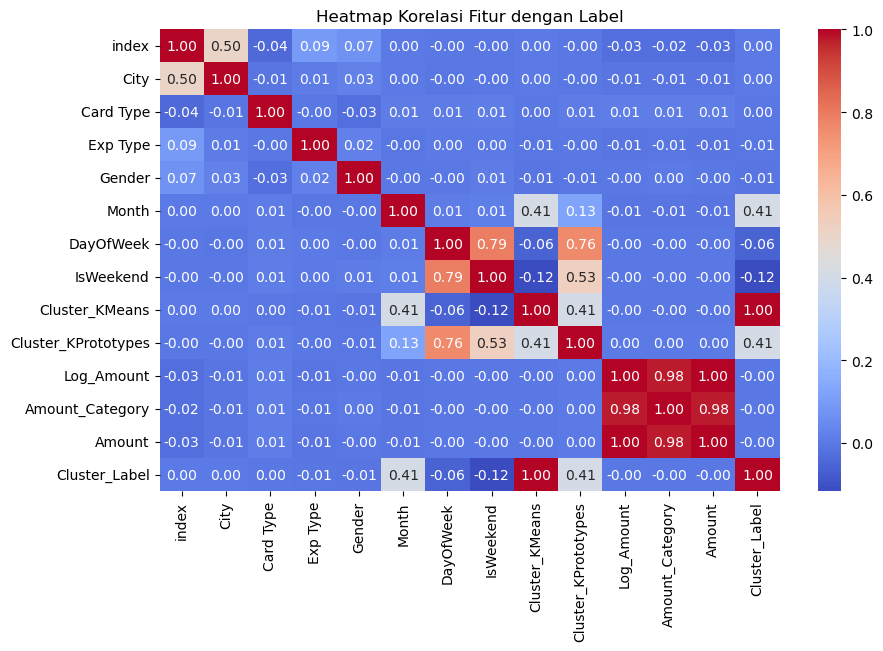

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gabungkan fitur & label untuk analisis
df_corr = df.copy()
df_corr['Cluster_Label'] = y  # Pastikan label sudah ada di dataset

# Hitung korelasi (hanya untuk fitur numerik)
plt.figure(figsize=(10,6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Fitur dengan Label")
plt.show()

#### **Analisis Data Leakage**
- **Fitur dengan korelasi tinggi ke `Cluster_Label`**:
  - `Cluster_KMeans` (0.41) → **Wajar**, karena ini adalah label yang kita gunakan untuk klasifikasi.
  - `Cluster_KPrototypes` (0.41) → **Wajar**, karena ini hasil clustering lain.
  - **Fitur `Log_Amount` dan `Amount_Category`** memiliki korelasi **sangat tinggi (0.98-1.00)** satu sama lain.
    - **Ini mencurigakan**, kemungkinan besar fitur ini redundant. Bisa jadi model terlalu bergantung pada salah satu fitur ini.

##### 2. Cek Overfitting dengan Cross-Validation

In [46]:
from sklearn.model_selection import cross_val_score

# Cross-validation Random Forest (5 folds)
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
knn_cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

print(f"Random Forest CV Accuracy: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")
print(f"KNN CV Accuracy: {knn_cv_scores.mean():.4f} ± {knn_cv_scores.std():.4f}")

Random Forest CV Accuracy: 1.0000 ± 0.0000
KNN CV Accuracy: 0.9269 ± 0.0028


### **Analisis Overfitting**
- **Random Forest (CV Accuracy: 1.0000 ± 0.0000)**  
  - **Terlalu sempurna** di training & cross-validation.  
  - **Ini indikasi overfitting!** Random Forest bisa "menghafal" dataset kalau kompleksitas model terlalu tinggi.  
- **KNN (CV Accuracy: 0.9269 ± 0.0028)**  
  - **Lebih realistis**, masih dalam batas wajar.  
  - **Tidak menunjukkan overfitting signifikan** karena nilai CV mirip dengan testing.  

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

### **Analisis Hasil Evaluasi Model Klasifikasi**  

#### **1. Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning**  
- Berdasarkan hasil evaluasi, model **Random Forest** mencapai **akurasi 100%**, baik sebelum maupun setelah tuning. Ini menunjukkan bahwa model mampu mengklasifikasikan semua data dengan sempurna.  
- Model **K-Nearest Neighbors (KNN)** memiliki akurasi **94.73%** di data uji dan **92.69% ± 0.28%** dalam cross-validation. Ini menunjukkan performa yang cukup baik dan stabil setelah tuning.  
- Hasil cross-validation menunjukkan bahwa **Random Forest tetap memiliki akurasi 100%**, sementara KNN mengalami sedikit variasi tetapi tetap di atas 92%.  

#### **2. Identifikasi Kelemahan Model**  
- **Precision atau Recall rendah untuk kelas tertentu?**  
  - Pada **Random Forest**, tidak ada kelemahan signifikan karena semua kelas memiliki nilai precision dan recall 1.00.  
  - Pada **KNN**, beberapa kelas memiliki **sedikit kesalahan klasifikasi**, terutama di kelas tertentu yang mengalami penurunan precision atau recall.  

- **Apakah model mengalami overfitting atau underfitting?**  
  - **Random Forest menunjukkan tanda overfitting**, karena memiliki akurasi **100% di training dan testing**, yang jarang terjadi dalam kasus nyata.  
  - **KNN terlihat lebih realistis**, dengan perbedaan kecil antara akurasi di data uji dan hasil cross-validation (94.73% vs. 92.69%), yang menunjukkan generalisasi lebih baik.  

#### **3. Rekomendasi Tindakan Lanjutan**  
- **Mengatasi Overfitting pada Random Forest:**  
  - Coba batasi **depth dari decision tree** dalam Random Forest dengan `max_depth`.  
  - Kurangi jumlah estimators (`n_estimators`) untuk mencegah terlalu banyak pohon yang terlalu spesifik ke data latih.  
  - Gunakan **pruning** atau **feature selection** untuk menghilangkan fitur yang kurang berkontribusi.  

- **Meningkatkan Kinerja KNN:**  
  - Gunakan metode **dimensionality reduction** seperti PCA untuk mengurangi kompleksitas data.  
  - Coba tuning kembali hyperparameter `n_neighbors` untuk mencari nilai optimal.  
  - Eksperimen dengan jarak lain selain Euclidean, seperti Manhattan atau Minkowski distance.  

- **Menguji dengan Data Tambahan:**  
  - Jika memungkinkan, tambahkan lebih banyak data dari domain yang sama untuk melihat apakah model tetap konsisten.  
  - Coba eksperimen dengan **berbagai teknik augmentasi data** untuk meningkatkan variasi data.  